<a href="https://colab.research.google.com/github/fxmike/data-science-bootcamp/blob/main/07_uczenie_glebokie/01_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

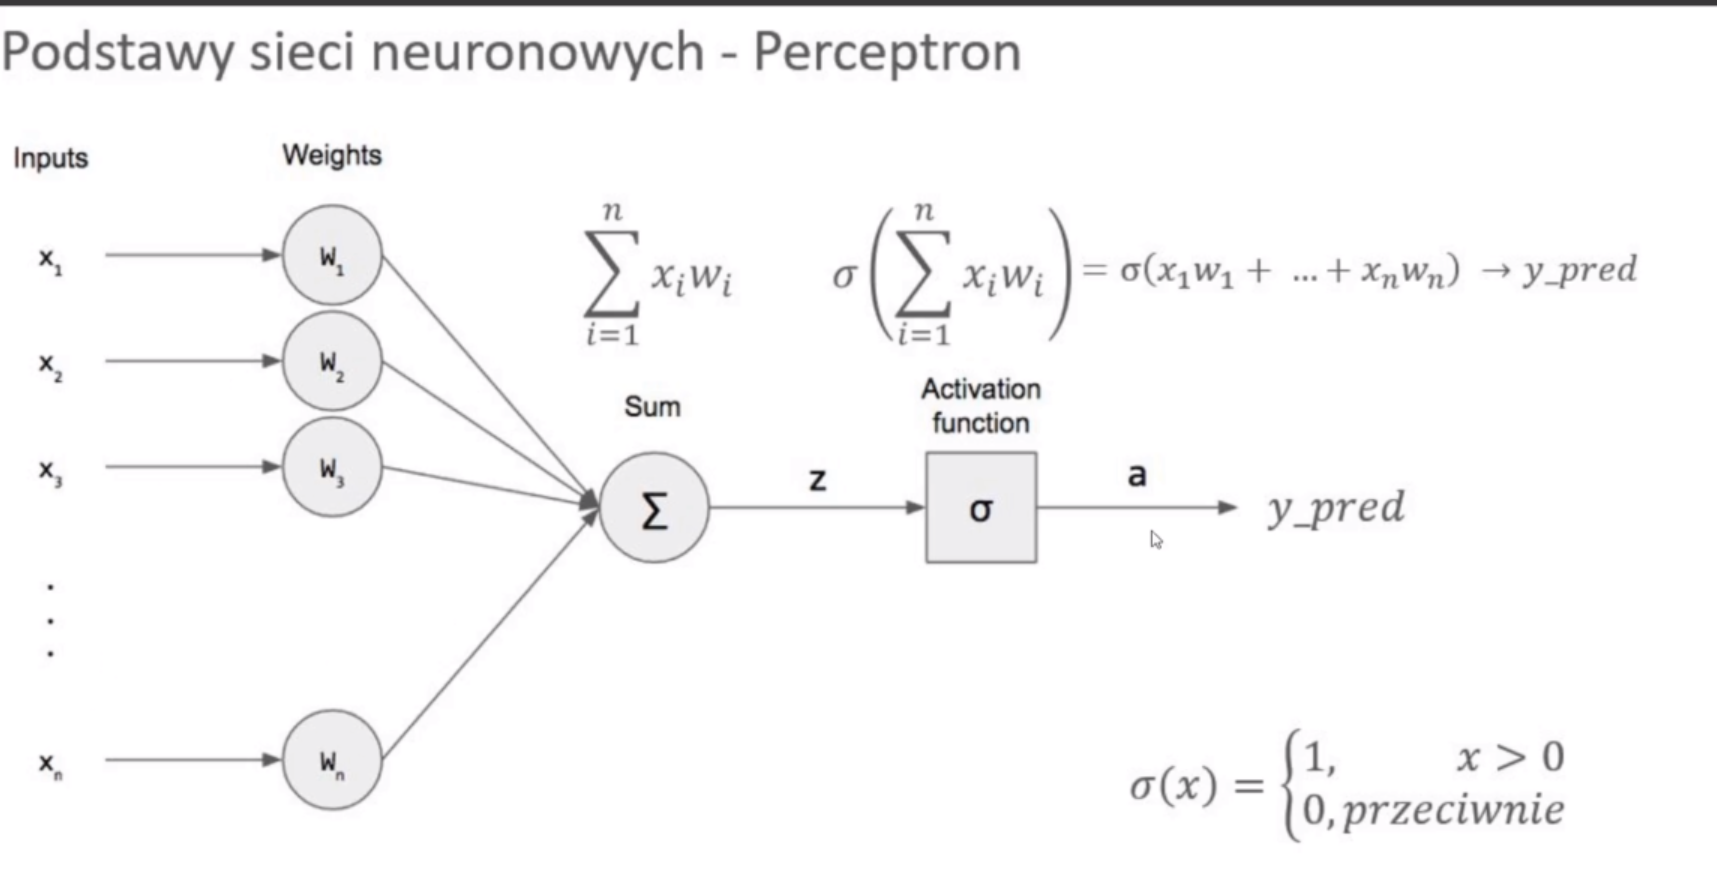

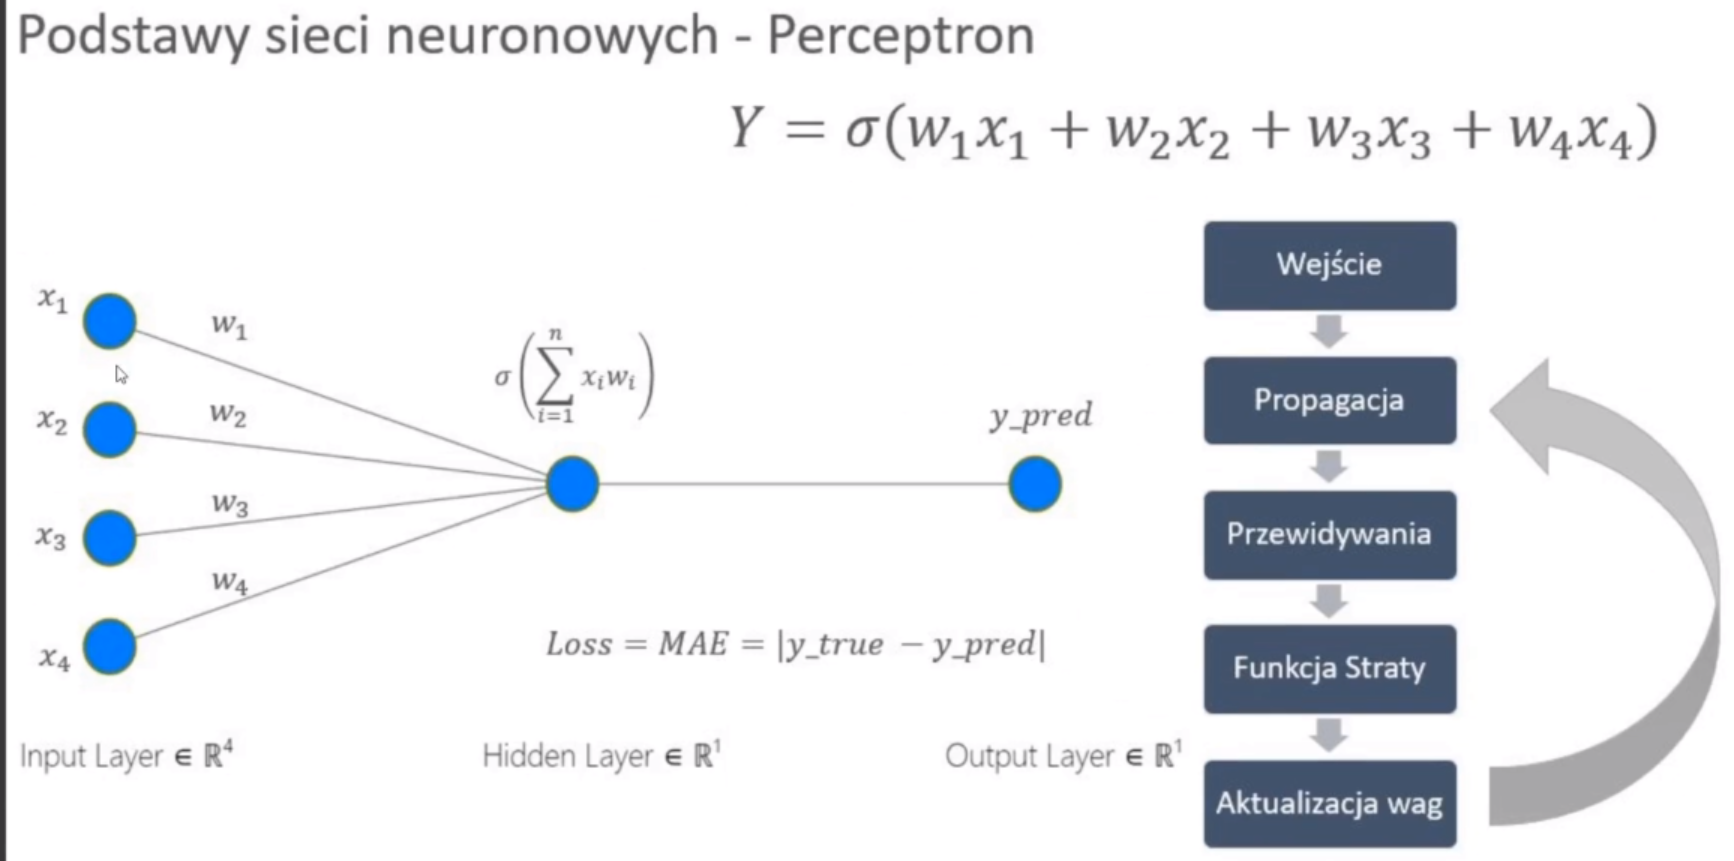

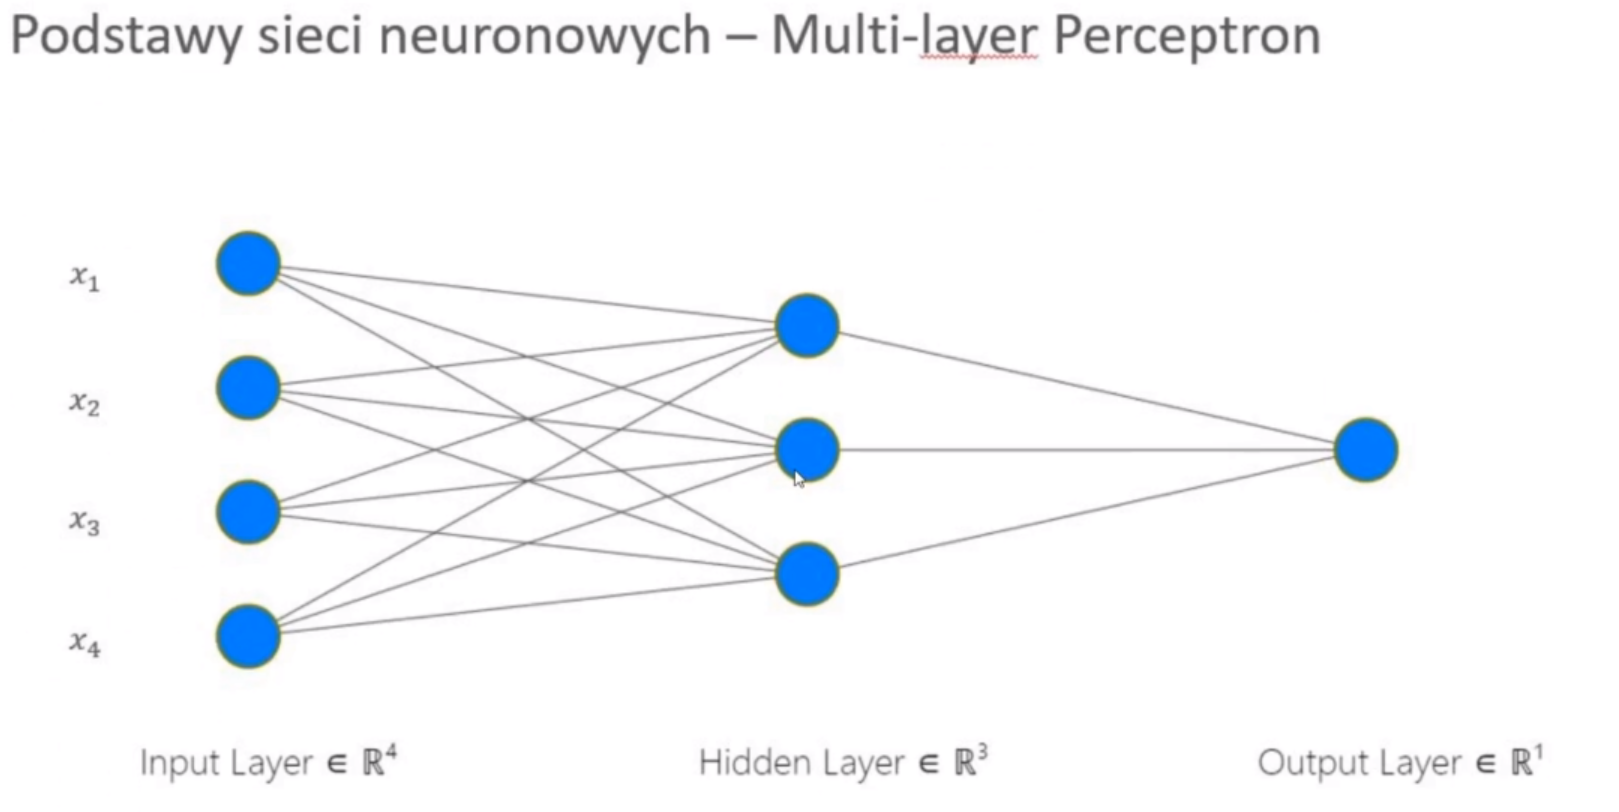

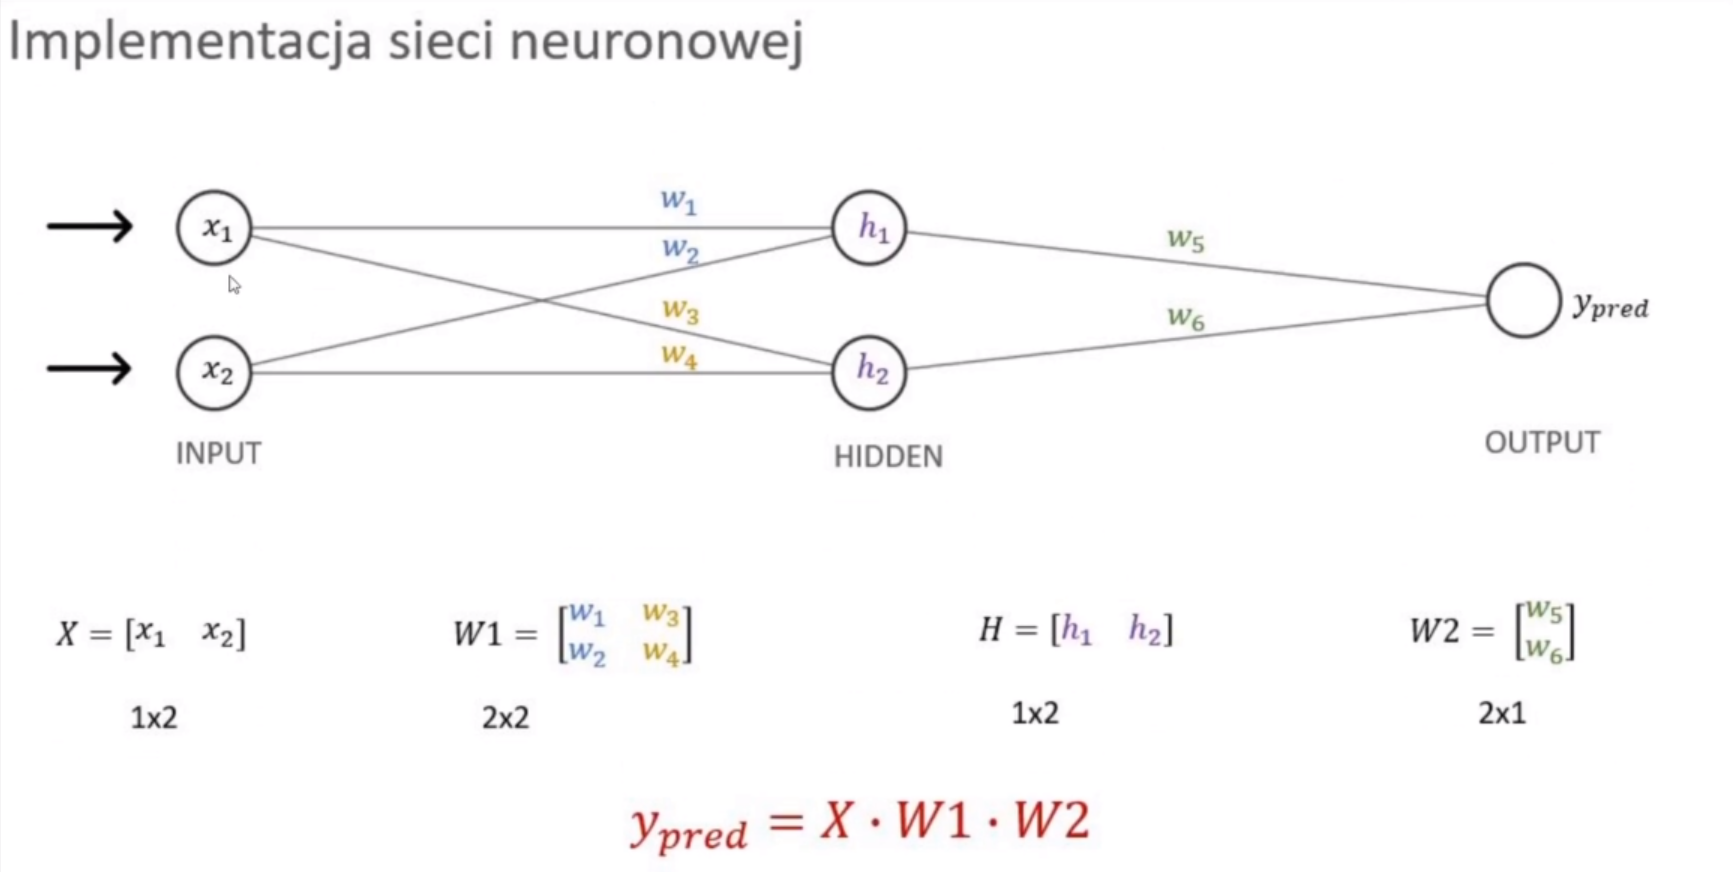

In [17]:
%tensorflow_version 2.x

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential # pozwala budować modele sekwencyjne (warstwa po wartswie)
from tensorflow.keras.layers import Flatten # wypłaszczanie danych
from tensorflow.keras.layers import Dense # standardowa wartswa w sieci (gęstopołączona)
from tensorflow.keras.layers import Dropout # warstwa kontrolująca overfit

np.set_printoptions(precision=12, suppress=True, linewidth=12)
print(tf.__version__)

2.5.0


In [19]:
(X_train, y_train), (X_test, y_test) = load_data()

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [20]:
print(X_train[0])

[[  0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0]
 [  0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0]
 [  0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0]
 [  0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0]
 [  0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    0   0]
 [  0   0
    0   0
    0   0
    0   0
    0   0
    0   0
    3  18
   18  18
  126 136
  175  26
  166 255
  247 127
    0   0
    0   0]
 [  0   0
    0   0
    0   0
    0   0
   30  36
   94 154
  170 253
  253 253
  253 253
  225 172
  253 242
  195  64
    0   0
    0   0]
 [  0   0
   

In [21]:
print('X_train[0] shape: ', X_train[0].shape)

X_train[0] shape:  (28, 28)


In [22]:
X_train = X_train / 255.
X_test = X_test / 255.

eksploaracja danych

(-0.5, 27.5, 27.5, -0.5)

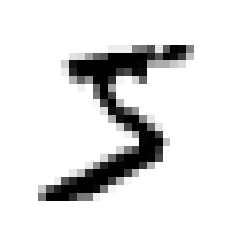

In [23]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

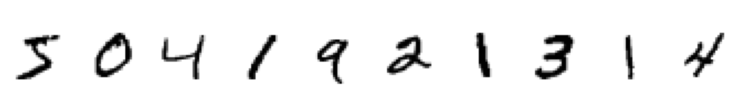

In [24]:
plt.figure(figsize=(13,13))

for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(y_train[i-1], color='white', fontsize=16)

plt.show()

budowa sieci neuronowej

In [25]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


trenowanie modelu

In [26]:
history = model.fit(X_train, y_train, epochs=5)
#epochs oznacza ile razy zbiór danych przejdzie przez sieć

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2952 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1450 - accuracy: 0.9568
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1113 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0897 - accuracy: 0.9715
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0764 - accuracy: 0.9761


ocena modelu

In [27]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0681 - accuracy: 0.9790


[0.0680934265255928, 0.9789999723434448]

In [28]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.295217,0.913917
1,0.144959,0.956783
2,0.111257,0.966783
3,0.089690,0.971550
4,0.076408,0.976067


In [32]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

predykcja na podstawie modelu

In [33]:
model.predict(X_test)

array([[0.000000006526,
        0.000000002086,
        0.000004494645,
        ...,
        0.9999256     ,
        0.000000126572,
        0.000000392012],
       [0.000001033934,
        0.0002806253  ,
        0.99947506    ,
        ...,
        0.            ,
        0.000000930029,
        0.000000000041],
       [0.000000253481,
        0.99850607    ,
        0.00018657732 ,
        ...,
        0.00089266215 ,
        0.0003708492  ,
        0.000000151402],
       ...,
       [0.000000000018,
        0.000000000283,
        0.000000000292,
        ...,
        0.000000694764,
        0.000000609453,
        0.00005018394 ],
       [0.00000009157 ,
        0.000000048908,
        0.000000000132,
        ...,
        0.000000002958,
        0.000054795903,
        0.000000000718],
       [0.000000003885,
        0.000000042337,
        0.000000288817,
        ...,
        0.            ,
        0.000000005504,
        0.000000000016]],
      dtype=float32)

In [34]:
y_pred = model.predict_classes(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



array([7,
       2,
       1,
       ...,
       4,
       5,
       6])

In [35]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head()

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [36]:
misclass = pred[pred['y_test'] != pred['y_pred']]
misclass.index[:10]

Int64Index([247, 259, 320, 321, 340, 381, 445, 582, 619, 659], dtype='int64')

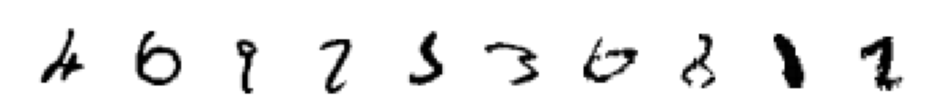

In [49]:
plt.figure(figsize=(16, 16))

for i, j in zip(range(1, 11), misclass.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]} y_pred: {y_pred[j]}', color='white', fontsize=12)

plt.show()

In [ ]:
# 